Alireza Abdi

Document Outline
1. Introduction & Objective
2. Exploratory Data Analysis
3. Statistical Testing
4. Logistic Regression Model for Author Verified Status
5. Machine Learning Models for Classification
6. Summary & Recommendations



# Introduction & Objective

TikTok users can flag videos and comments they believe contain factual claims. These flags create a queue for moderators to review, but the sheer volume makes it tough to keep up. To tackle this, TikTok is building a system to automatically detect if a video is making a factual claim or expressing an opinion. If it works, this will help them sort through flagged content faster and deal with the most important issues first.
Potential for Harm: False or misleading claims can spread misinformation, potentially leading to harmful consequences. This can range from health risks (e.g., false cures) to social unrest (e.g., conspiracy theories). Verifiability: Claims can be fact-checked and proven true or false. This makes them subject to scrutiny and potential moderation if they spread falsehoods. Impact on Trust: A platform rife with misinformation erodes user trust. Identifying and addressing false claims helps maintain a reliable information environment.

TikTok project, the focus is on identifying claims because they pose a greater risk of spreading misinformation and causing harm than opinion.

TikTok users can report videos that they believe violate the platform's terms of service. Because there are millions of TikTok videos created and viewed every day, this means that many videos get reported—too many to be individually reviewed by a human moderator.

Analysis indicates that when authors do violate the terms of service, they're much more likely to be presenting a claim than an opinion. Therefore, it is useful to be able to determine which videos make claims and which videos are opinions.

TikTok wants to build a machine learning model to help identify claims and opinions. Videos that are labeled opinions will be less likely to go on to be reviewed by a human moderator. Videos that are labeled as claims will be further sorted by a downstream process to determine whether they should get prioritized for review. For example, perhaps videos that are classified as claims would then be ranked by how many times they were reported, then the top x% would be reviewed by a human each day.

A machine learning model would greatly assist in the effort to present human moderators with videos that are most likely to be in violation of TikTok's terms of service.

# Exploratory Data Analysis

In [92]:
#Import Packages and Data
from google.colab import drive
drive.mount('/content/drive')
# Import relevant packages
import numpy as np
import pandas as pd

# Path to the TikTok dataset in your Google Drive
data = pd.read_csv ('/content/drive/My Drive/TIKTOK_DATASET.csv')

# Get the shape of the data
data.shape



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(19382, 12)

In [ ]:
# Display the first several rows of the DataFrame
data.head(n = 10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [ ]:
# Get summary info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [ ]:
# Get summary statistics of the data
data.describe(include = "all")

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


In [ ]:
# Get summary statistics of the data
data.describe(include = "all")

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


In [ ]:
data["claim_status"].value_counts()

,count
claim_status,
claim,9608
opinion,9476


In [ ]:
# Determine the average view counts of videos with a "claim" status
data_claims = data[data["claim_status"] == "claim"]  # use a Boolean mask to subset data
print("Mean:", "%.2f" % data_claims["video_view_count"].mean())
print("Median:", data_claims["video_view_count"].median())

Mean: 501029.45
Median: 501555.0


In [ ]:
# Determine the average view counts of videos with an "opinion" status
data_opinions = data[data["claim_status"] == "opinion"]  # use a Boolean mask to subset data
print("Mean:", "%.2f" % data_opinions["video_view_count"].mean())
print("Median:", data_opinions["video_view_count"].median())

Mean: 4956.43
Median: 4953.0


In [ ]:
# Determine counts for each group combination of `claim_status`
# and `author_ban_status`
data.groupby(["claim_status", "author_ban_status"])["#"].count()

claim_status  author_ban_status
claim         active               6566
              banned               1439
              under review         1603
opinion       active               8817
              banned                196
              under review          463
Name: #, dtype: int64


**Videos classified as "claim" are more likely to be posted by authors who are "banned" or "under review" compared to those classified as "opinion."**

In [ ]:
# Calculate the median video share count of `author_ban_status`
data.groupby("author_ban_status")["video_share_count"].median()

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


In [ ]:
# Calculate the count, mean, and median of engagement columns
# grouped by `author_ban_status`
# Calculate the count, mean, and median of engagement columns
# grouped by `author_ban_status`
data.groupby(["author_ban_status"]).agg({"video_view_count" : ["count", "mean", "median"],
                                         "video_like_count": ["mean", "median"],
                                         "video_share_count": ["mean", "median"]})

video_view_count                          video_like_count  \
                             count           mean    median             mean   
author_ban_status                                                              
active                       15383  215927.039524    8616.0     71036.533836   
banned                        1635  445845.439144  448201.0    153017.236697   
under review                  2066  392204.836399  365245.5    128718.050339   

                            video_share_count           
                     median              mean   median  
author_ban_status                                       
active               2222.0      14111.466164    437.0  
banned             105573.0      29998.942508  14468.0  
under review        71204.5      25774.696999   9444.0

**Although "banned" and "under review" authors make up a smaller group compared to "active" users, they receive more views, likes, and shares**

In [ ]:
# Feature extraction exercise
# Create new columns to better understand engagement rates:
# `likes_per_view`, `comments_per_view`, and `shares_per_view`

data_eng = data.copy()

data_eng["likes_per_view"] = data["video_like_count"] / data["video_view_count"]
data_eng["comments_per_view"] = data["video_comment_count"] / data["video_view_count"]
data_eng["shares_per_view"] = data["video_share_count"] / data["video_view_count"]

# Compile information to calculate the count, mean, and median
# grouped by `claim_status` and `author_ban_status`
data_eng.groupby(["claim_status", "author_ban_status"]).agg({"likes_per_view" : ["count", "mean", "median"],
                                                            "comments_per_view": ["mean", "median"],
                                                            "shares_per_view": ["mean", "median"]})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view           shares_per_view  \
                                            mean    median            mean   
claim_status author_ban_status                                               
claim        active                     0.001393  0.000776        0.065456   
             banned                     0.001377  0.000746        0.067893   
             under review               0.001367  0.000789        0.065733   
opinion      active                     0.000517  0.000252        0.043729   
             banned                     0.000434  0.000193        0.040531   
             under review               0.000536  0.000293        0.044472   

                                          
                                  median  
claim_status author_ban_status            
claim        active             0.049279  
             banned             0.051606  
             under review       0.049967  
opinion      active             0.032405  
             banned             0.030728  
             under review       0.035027

**It seems that video engagement depends more on whether the video is marked as a "claim" than on whether the author is banned. Videos labelled as "claim" get more likes, comments, and shares, no matter the author's ban status.**







2.2 *Visualizations*


In [ ]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

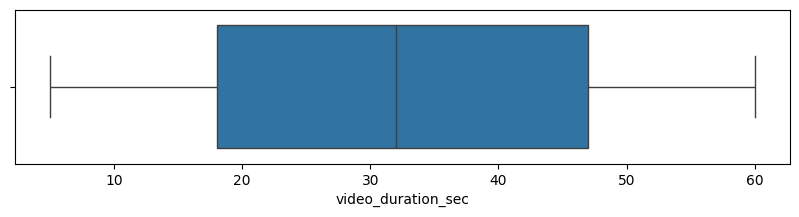

In [ ]:
data = pd.read_csv('/content/drive/My Drive/TIKTOK_DATASET.csv')

# Create a boxplot to visualize distribution of `video_duration_sec`

plt.figure(figsize=(10,2))
sns.boxplot(data, x="video_duration_sec");


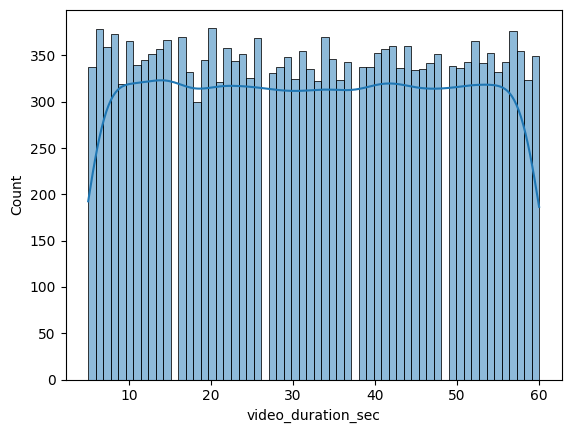

In [ ]:
# Create a histogram

sns.histplot(x=data["video_duration_sec"], bins=60, kde=True);

**video_view_count**


<Axes: xlabel='video_view_count'>

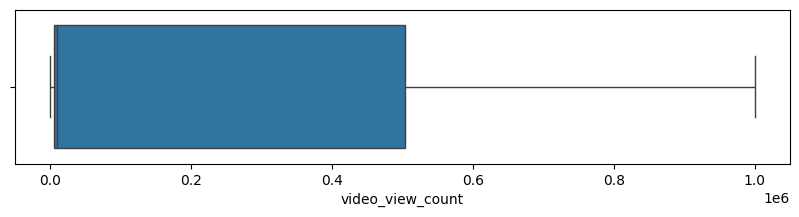

In [ ]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
plt.figure(figsize=(10,2))
sns.boxplot(x=data["video_view_count"])

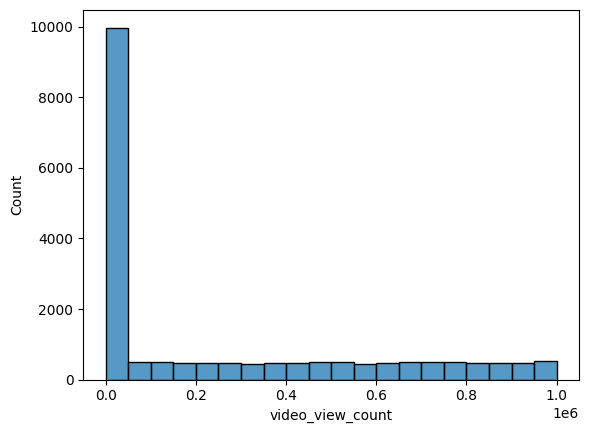

In [ ]:
# Create a histogram

sns.histplot(x=data["video_view_count"], bins=20);

**The histogram show an extreme right skew in the distribution of the video view count. Most vidoes in the dataset have lower view count. The boxplot shows the median value is closer to the first quartile which is to zero. The whisker extending to right indicates a long tail of high views.**

**video_like_count**

<Axes: xlabel='video_like_count'>

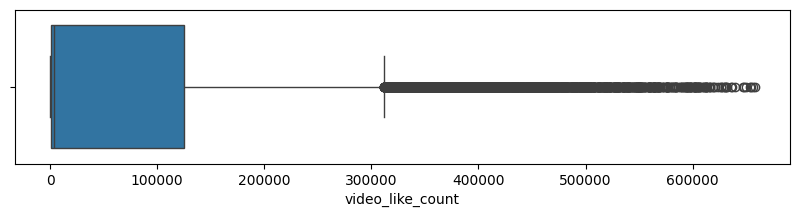

In [ ]:
# Create a boxplot to visualize distribution of `video_like_count`

plt.figure(figsize=(10,2))
sns.boxplot(x=data["video_like_count"])

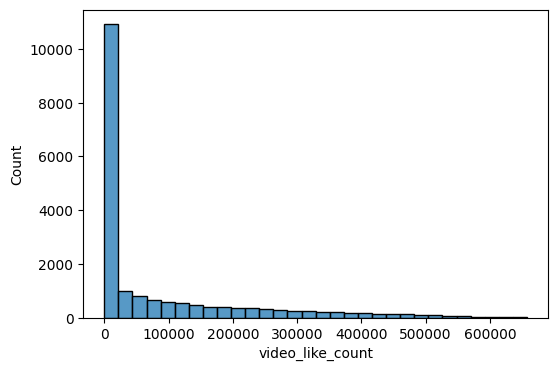

In [ ]:
# Create a histogram

plt.figure(figsize=(6,4))
sns.histplot(x=data["video_like_count"], bins=30);

**The distribution follow a similar pattern as the video_view_count with an addition of outliers. The boxplot shows the median like count is close to zero, when videos with like greater than 300,00 are considered to be outliers. The histogram show an extreme right skew distribution of the video_like_count. Also an indication that more video have less likes compared to videos with high like counts**

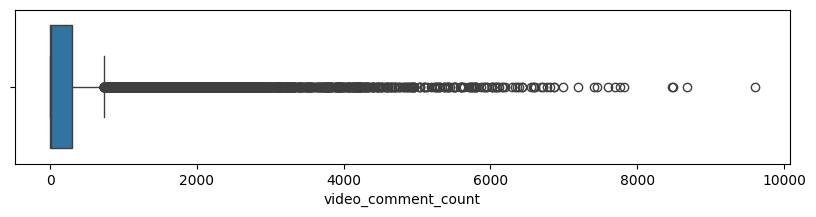

In [ ]:
# Create a boxplot to visualize distribution of `video_comment_count`

plt.figure(figsize=(10,2))
sns.boxplot(x=data["video_comment_count"]);

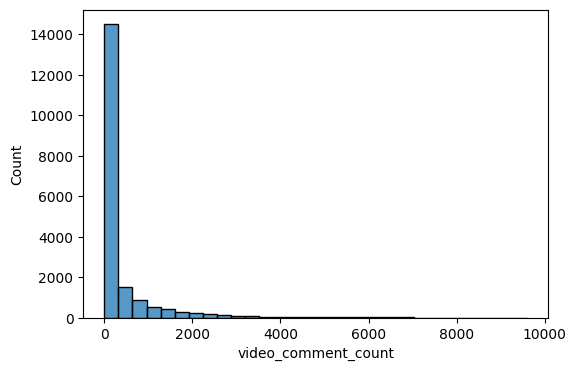

In [ ]:
# Create a histogram

plt.figure(figsize=(6,4))
sns.histplot(x=data["video_comment_count"], bins=30);

**From the boxplot and histogram, I noticed the distribution of the video comment count is skewed to extremely to the right with the median value close to zero. The boxplot indicate there are outlier values in the comment counts. Most of the vidoes have less comment counts.**

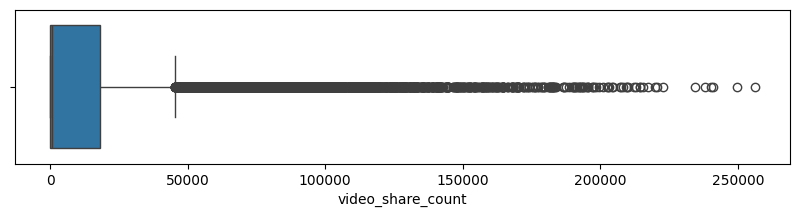

In [ ]:
# Create a boxplot to visualize distribution of `video_share_count`

plt.figure(figsize=(10,2))
sns.boxplot(x=data["video_share_count"]);

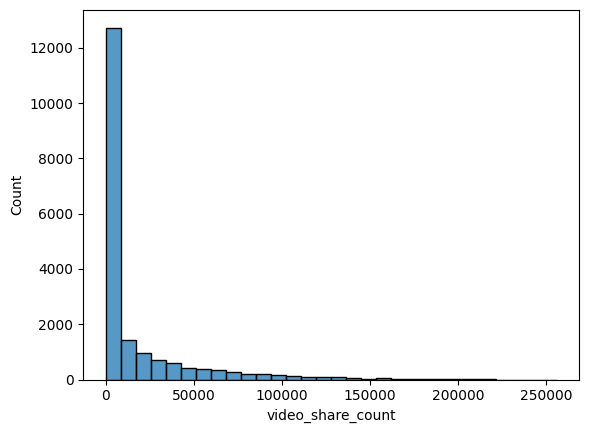

In [ ]:
# Create a histogram

# plt.figure(figsize=(10,2))
sns.histplot(x=data["video_share_count"], bins=30);

**A similar pattern obverved in the distribution of video comment count can observed here too.**


**video_download_count**



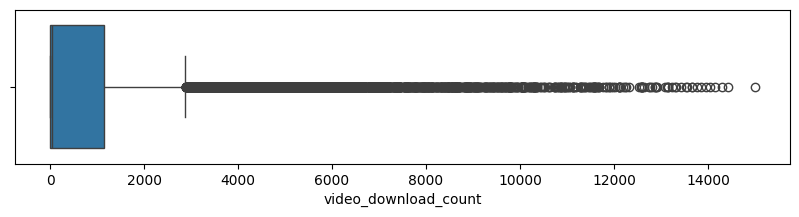

In [ ]:
# Create a boxplot to visualize distribution of `video_download_count`

plt.figure(figsize=(10,2))
sns.boxplot(x=data["video_download_count"]);

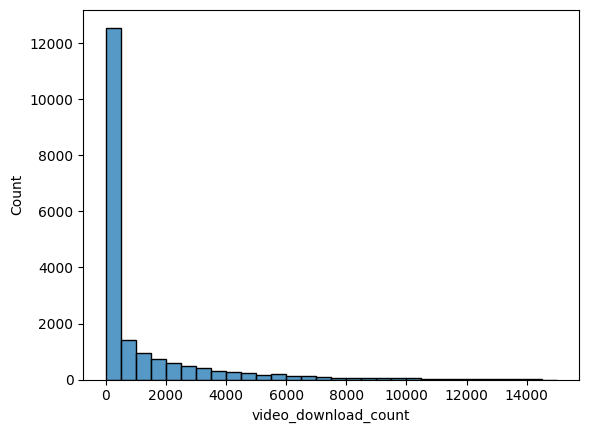

In [ ]:
# Create a histogram

sns.histplot(x=data["video_download_count"], bins=30);

**Claim status by verification status**

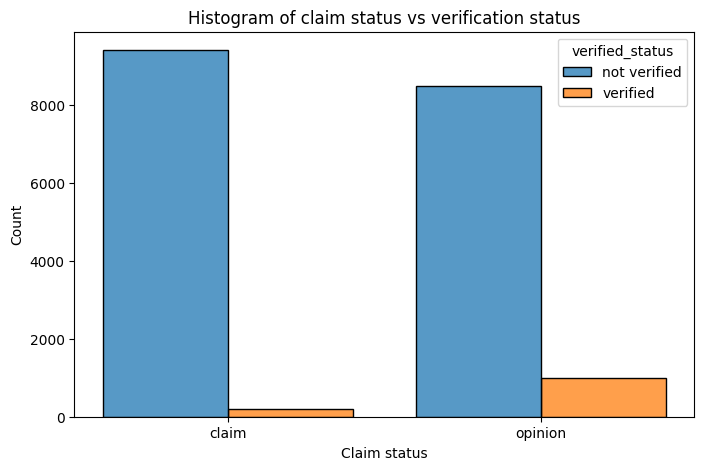

In [ ]:
# Create a histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="claim_status", hue="verified_status", shrink=0.8, multiple="dodge")
plt.title("Histogram of claim status vs verification status")
plt.xlabel("Claim status");

**The number vidoes by verified users are less compared to number of unverified users. The chart also shows that verified users post more opinion videos compared to videos with claims.**


**Claim status by author ban status**


<Axes: xlabel='claim_status', ylabel='Count'>

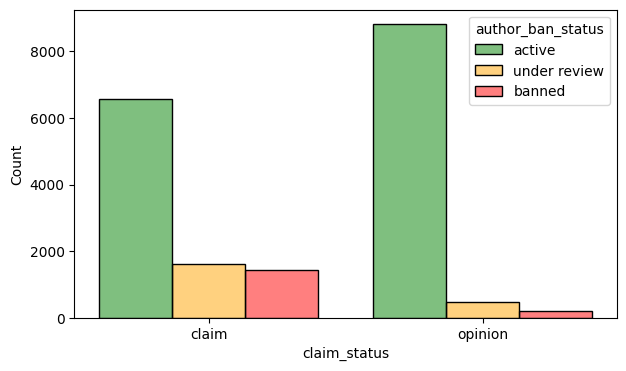

In [ ]:
# Create a histogram

plt.figure(figsize=(7,4))
sns.histplot(data, x="claim_status", hue="author_ban_status", multiple="dodge",
            hue_order=["active", "under review", "banned"],
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
            shrink=0.8,
            alpha=0.5)

**The number of active authors exceeds that of banned authors in both the claims and opinions categories. However, there are more active authors and fewer banned authors in the opinion status category.**








**Median view counts by ban status**


Text(0, 0.5, 'Video view count (median)')

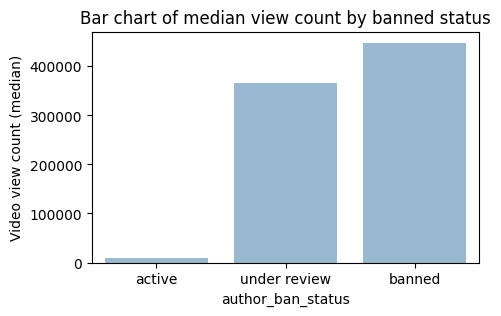

In [ ]:
# Create a bar plot

plt.figure(figsize=(5,3))
sns.barplot(data , x="author_ban_status", y="video_view_count",
            estimator="median", errorbar=None, order=["active", "under review", "banned"], alpha=0.5)
plt.title("Bar chart of median view count by banned status")
plt.ylabel("Video view count (median)")

**Total views by claim status**


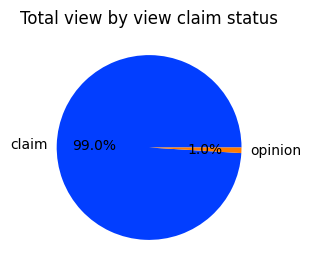

In [ ]:
# Create a pie graph

plt.figure(figsize=(3,3))
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]
plt.pie(data.groupby(["claim_status"])["video_view_count"].sum(), labels=["claim", "opinion"],
        colors=colors, autopct='%.1f%%')
plt.title("Total view by view claim status");

**Determine outliers**

In [ ]:
###video_share_count
count_variables = ["video_view_count", "video_like_count",
                   "video_share_count", "video_download_count", "video_comment_count"]

for _, col in enumerate(count_variables):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    median = data[col].median()
    outlier_threshold = median + 1.5*IQR
    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[col] > outlier_threshold).sum()
    print(f"Number of outliers, {col}: {outlier_count}")

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


**Different models handle outliers differently. Therefore, outliers will be handled (i.e., removed) prior to model building in future sections.**

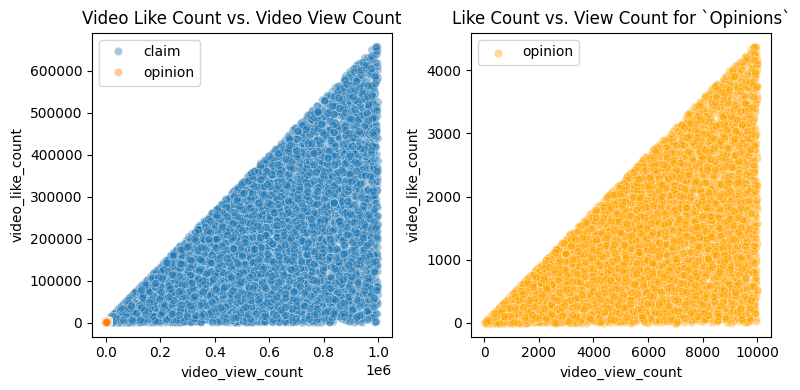

In [ ]:
# Create a scatterplot of `video_view_count` vs `video_like_count`
# according to 'claim_status'

fig, ax = plt.subplots(1, 2, figsize = (8, 4))

sns.scatterplot(data = data,
                x = "video_view_count",
                y = "video_like_count",
                hue = "claim_status",
                alpha = 0.4,
                ax = ax[0])
ax[0].legend()
ax[0].set_title("Video Like Count vs. Video View Count")

sns.scatterplot(data = data[data["claim_status"] == "opinion"],
                x = "video_view_count",
                y = "video_like_count",
                c = "orange",
                alpha = 0.4,
                ax = ax[1])
ax[1].legend(labels = ["opinion"])
ax[1].set_title("Like Count vs. View Count for `Opinions`")

plt.tight_layout()
plt.show()

**The above scatterplots confirm that videos classified as "claim" tend to have much higher view and like counts than those videos classified as "opinion".**



**2.3 Summary:** The dataset contains nearly 20,000 entries with 12 features. Most of the features are numerical, but four are categorical. The distribution of claim_status is balanced, which should make future modelling easier (assuming missing data and outliers are dealt with properly). Data visualisations show that many variables related to video views, likes, comments, shares, and downloads are heavily skewed. This is typical of social media, where most content reaches only a small audience, but a few "viral" videos get a lot of attention. Interestingly, videos marked as "claim" tend to get more views and likes compared to those marked as "opinion". Further analysis also shows that users who post "claim" videos are more likely to be reviewed or banned for violating terms of service. However, video engagement seems to be more influenced by claim_status than by author_ban_status, as "claim" videos get more views, likes, and comments regardless of whether the author is banned.








# Statistical Testing

*Data Cleaning*

In [ ]:
import pandas as pd
import numpy as np

# Import packages for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for statistical analysis/hypothesis testing

from scipy import stats

# Determine how many rows are missing data for data cleaning purpose
data.isnull().sum()

,0
#,0
claim_status,298
video_id,0
video_duration_sec,0
video_transcription_text,298
verified_status,0
author_ban_status,0
video_view_count,298
video_like_count,298
video_share_count,298


In [ ]:
# Drop rows with missing values and save as a new dataframe

print("Number of entries prior to cleaning:", data.shape[0])
data_cleaned = data.dropna(axis = 0)
print("Number of entries removed after cleaning:", data.shape[0] - data_cleaned.shape[0])

Number of entries prior to cleaning: 19382
Number of entries removed after cleaning: 298


***Hypothesis Testing***


**Null hypothesis**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

**Alternative hypothesis**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

Our goal in this step is to conduct a two-sample t-test.

State the null hypothesis and the alternative hypothesis
Choose a signficance level
Find the p-value
Reject or fail to reject the null hypothesis

**H0:** There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

**H1:** There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

In [ ]:
# Compute the mean `video_view_count` for each group in `verified_status`
data_cleaned.groupby("verified_status")["video_view_count"].mean()

,video_view_count
verified_status,
not verified,265663.785339
verified,91439.164167


In [ ]:
# Conduct a two-sample t-test to compare means

# Subset data accordingly using Boolean masks
data_cleaned_verified = data_cleaned[data_cleaned["verified_status"] == "verified"]
data_cleaned_unverified = data_cleaned[data_cleaned["verified_status"] == "not verified"]

# Conduct the hypothesis testing to calculate the p-value
tstat, pvalue = stats.ttest_ind(
    a = data_cleaned_verified["video_view_count"],
    b = data_cleaned_unverified["video_view_count"],
    equal_var = False)

print("t-statistic:", tstat)
print("p-value:", pvalue)

t-statistic: -25.499441780633777
p-value: 2.6088823687177823e-120


**The p-value which is much smaller than 0.05 (p ≈ 2.61e-120). This indicates strong evidence against the null hypothesis of equal means for the two samples. Therefore, we reject the null hypothesis and conclude that there is a significant difference in the mean video view count between verified and unverified accounts on TikTok**

Market Segmentation: The analysis shows that there is a statistically significant difference in the average view counts between videos from verified accounts and videos from unverified accounts. This suggests there might be fundamental behavioral or preference differences between these two groups of accounts.

Resource Allocation: Understanding the differences between the two groups can help TikTok allocate resources more effectively. For example, they can prioritize investments in areas that are more impactful or relevant to specific customer segments, thereby optimizing resource allocation and maximizing returns.

# Logistic Regression Model for Author Verified Status


**Regression Analysis: Simplify complex data relationships**

**TikTok project, the focus is on identifying claims because they pose a greater risk of spreading misinformation and causing harm than opinion. **

Data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users**

**The goal** is to build a logistic regression model and evaluate the model.
This activity has three parts:

**Part 1:** EDA & Checking Model Assumptions

What are some purposes of EDA before constructing a logistic regression model?
**Part 2:** Model Building and Evaluation

What resources do you find yourself using as you complete this stage?
**Part 3:** Interpreting Model Results

What key insights emerged from your model(s)?
What business recommendations do you propose based on the models built?

In [ ]:
# Import packages for data preprocessing
import sklearn.utils as utils
from sklearn.model_selection import train_test_split

# Import relevant packages for data modeling
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [ ]:
print("Number of entries prior to cleaning:", data.shape[0])
data_cleaned = data.dropna(axis = 0)
print("Number of entries removed after cleaning:", data.shape[0] - data_cleaned.shape[0])

Number of entries prior to cleaning: 19382
Number of entries removed after cleaning: 298


In [ ]:
data_cleaned.groupby("verified_status")["video_view_count"].mean()


,video_view_count
verified_status,
not verified,265663.785339
verified,91439.164167


In [ ]:
from scipy import stats

# Conduct a two-sample t-test to compare means

# Subset data accordingly using Boolean masks
data_cleaned_verified = data_cleaned[data_cleaned["verified_status"] == "verified"]
data_cleaned_unverified = data_cleaned[data_cleaned["verified_status"] == "not verified"]

# Conduct the hypothesis testing to calculate the p-value
tstat, pvalue = stats.ttest_ind(
    a = data_cleaned_verified["video_view_count"],
    b = data_cleaned_unverified["video_view_count"],
    equal_var = False)

print("t-statistic:", tstat)
print("p-value:", pvalue)

t-statistic: -25.499441780633777
p-value: 2.6088823687177823e-120


In [ ]:
# Import packages for data preprocessing
import sklearn.utils as utils
from sklearn.model_selection import train_test_split

# Import relevant packages for data modeling
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [ ]:
# Check for and handle duplicates as necessary
data_cleaned.duplicated().sum()

0

There are no duplicate entries in the dataset.

Outliers
Based on the previous boxplots in 2. Exploratory Data Analysis, the following columns contain outliers:

video_like_count
video_comment_count
video_share_count
video_download_count
However, for this notebook, outliers will only be removed based on the video_like_count and video_comment_count columns using the interquartile ranges.

In [ ]:
# Handle outliers in `video_like_count`

percentile_25 = data_cleaned["video_like_count"].quantile(0.25)
percentile_75 = data_cleaned["video_like_count"].quantile(0.75)
iqr = percentile_75 - percentile_25  # interquartile range

lower_limit = percentile_25 - (1.5 * iqr)
upper_limit = percentile_75 + (1.5 * iqr)

outlier_mask = (data_cleaned["video_like_count"] >= lower_limit) & \
(data_cleaned["video_like_count"] <= upper_limit)

data_logm = data_cleaned[outlier_mask].copy()

print("Entries removed:", data_cleaned.shape[0] - data_logm.shape[0])

Entries removed: 1726


In [ ]:
# Handle outliers in `video_comment_count`

percentile_25 = data_cleaned["video_comment_count"].quantile(0.25)
percentile_75 = data_cleaned["video_comment_count"].quantile(0.75)
iqr = percentile_75 - percentile_25  # interquartile range

lower_limit = percentile_25 - (1.5 * iqr)
upper_limit = percentile_75 + (1.5 * iqr)

outlier_mask = (data_logm["video_comment_count"] >= lower_limit) & \
(data_logm["video_comment_count"] <= upper_limit)

pre_removal = data_logm.shape[0]
data_logm = data_logm[outlier_mask].copy()

print("Entries removed:", pre_removal - data_logm.shape[0])

Entries removed: 1664


**Class Balance & Resampling**


In [ ]:
# Check class balance for the outcome variable: `verified_status`
print(data_logm["verified_status"].value_counts())
print()
print(data_logm["verified_status"].value_counts(normalize = True))

verified_status
not verified    14568
verified         1126
Name: count, dtype: int64

verified_status
not verified    0.928253
verified        0.071747
Name: proportion, dtype: float64


**Approximately 92.8% of the dataset represents videos posted by unverified accounts and 7.1% % represents videos posted by verified accounts. So the outcome variable is not very balanced.**



In [ ]:
# Use upsampling to create class balance in the outcome variable

# Identify data from the majority and minority classes
data_verified = data_logm[data_logm["verified_status"] == "verified"]
data_unverified = data_logm[data_logm["verified_status"] == "not verified"]

# Upsample the minority class
data_verified_upsampled = utils.resample(data_verified,
                                         replace = True,  # sample with replacement
                                         n_samples = data_unverified.shape[0],
                                         random_state = 42)

# Concatenate dataframes
data_logm_sampled = pd.concat([data_unverified, data_verified_upsampled], axis = 0)

# Display new class counts
data_logm_sampled["verified_status"].value_counts()

,count
verified_status,
not verified,14568
verified,14568


In [ ]:
# Get the average `video_transcription_text` length for claims and opinions
print("Average length of `video_transcription_text` for claims:", "%.2f" % \
      data_logm[data_logm["claim_status"] == "claim"]["video_transcription_text"].str.len().mean())
print("Average length of `video_transcription_text` for opinions:", "%.2f" % \
      data_logm[data_logm["claim_status"] == "opinion"]["video_transcription_text"].str.len().mean())

Average length of `video_transcription_text` for claims: 95.55
Average length of `video_transcription_text` for opinions: 82.72


**Extract the length of each video_transcription_text and add this as a column to the dataframe, so that it can be used as a potential feature in the model.**

In [ ]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_logm_sampled["transcription_text_len"] = data_logm_sampled["video_transcription_text"].str.len()
data_logm_sampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_text_len
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


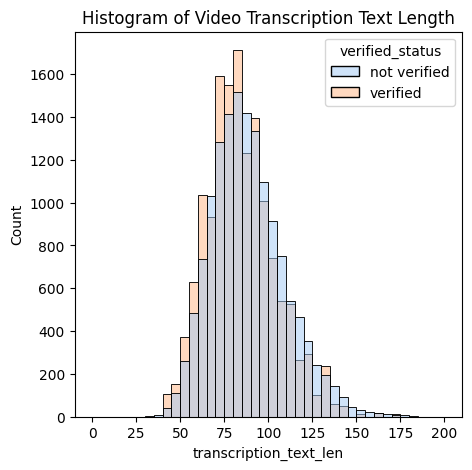

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of `video_transcription_text` length
fig = plt.figure(figsize = (5, 5))
sns.histplot(data = data_logm_sampled,
             x = "transcription_text_len",
             hue = "verified_status",
             bins = range(0, 201, 5),
             multiple = "layer",
             palette = "pastel")
plt.title("Histogram of Video Transcription Text Length")
plt.show()

**Examine correlations**

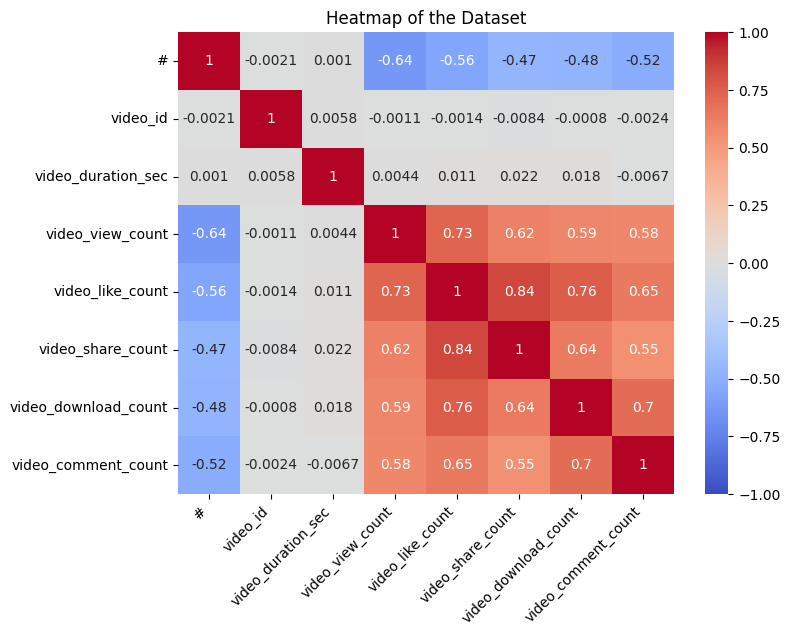

In [ ]:
# Generate a correlation heatmap of the variables
# to investigate potential multicollinearity
# and variable relationships with the outcome variable

plt.figure(figsize=(8, 6))
sns.heatmap(data_logm.corr(numeric_only = True),
            annot = True,  # sets annotation to be true
            cmap = "coolwarm",
            vmin = -1.0,
            vmax = 1.0)
plt.title("Heatmap of the Dataset")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.show()

**The heatmap shows video_like_count have a strong positive correlation with video_view_count, video_share_count , video_comment_count and video_download_count. This may indicate multicollinearity.**

In [ ]:
# Encode relevant categorical variables

# Copy dataframe
data_logm_dummies = data_logm_sampled.copy()

# Map outcome variable
data_logm_dummies["verified_status"] = data_logm_dummies["verified_status"].map({"not verified" : False,
                                                                                 "verified" : True})

# Encode other categorical variables as dummy variables
data_logm_dummies = pd.get_dummies(data_logm_dummies,
                                   columns = ["claim_status",
                                              "author_ban_status"],
                                   drop_first = True)

# Display first several rows of new DataFrame
data_logm_dummies.head()

,#,video_id,video_duration_sec,video_transcription_text,verified_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_text_len,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1,7017666017,59,someone shared with me that drone deliveries a...,False,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,2,4014381136,32,someone shared with me that there are more mic...,False,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,3,9859838091,31,someone shared with me that american industria...,False,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,4,1866847991,25,someone shared with me that the metro of st. p...,False,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,5,7105231098,19,someone shared with me that the number of busi...,False,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


**Model Building**


In [ ]:
# Import packages for data manipulation

import pandas as pd
import numpy as np

# Import packages for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.utils import resample

# Import packages for data modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
# Load dataset into dataframe
data = pd.read_csv('/content/drive/My Drive/TIKTOK_DATASET.csv')

In [ ]:
# Display first few rows

data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
# Get number of rows and columns

data.shape

(19382, 12)

In [ ]:
# Get data types of columns

data.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


In [ ]:
# Get basic information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [ ]:
# Generate basic descriptive stats

data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [ ]:
# Check for missing values

data.isna().mean().sort_values(ascending=True)

,0
#,0.000000
video_id,0.000000
video_duration_sec,0.000000
verified_status,0.000000
author_ban_status,0.000000
claim_status,0.015375
video_transcription_text,0.015375
video_view_count,0.015375
video_like_count,0.015375
video_share_count,0.015375


In [ ]:
# Drop rows with missing values

data = data.dropna(axis=0)

In [ ]:
# Display first few rows after handling missing values

data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
# Check for duplicates

data.duplicated().sum()

0

Text(0.5, 1.0, 'Box plot of video duration in second')

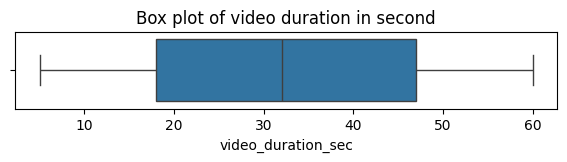

In [ ]:
# Create a boxplot to visualize distribution of `video_duration_sec`

plt.figure(figsize=(7,1))
sns.boxplot(data["video_duration_sec"], orient="h");
plt.title("Box plot of video duration in second")

Text(0.5, 1.0, 'Box plot to check for outlier in video view count')

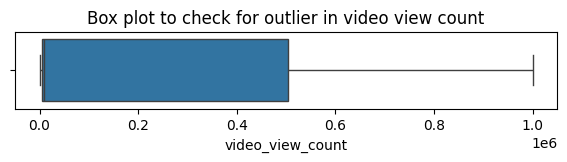

In [ ]:
# Create a boxplot to visualize distribution of `video_view_count`

plt.figure(figsize=(7,1))
sns.boxplot(data["video_view_count"], orient="h");
plt.title("Box plot to check for outlier in video view count")

**The boxplot reveals there is not outlier in the data. However, with the median value close to zero, this is an indication of left skew distribution. This is can further explored with a histogram. Clearly the video_view_count is not normally distributed.**



In [ ]:
# Check and Handle outlier
Q1 = data["video_like_count"].quantile(0.25)
Q3 = data["video_like_count"].quantile(0.75)

iqr = Q3 - Q1
upper_limit = Q3 + 1.5 * iqr

data.loc[data["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

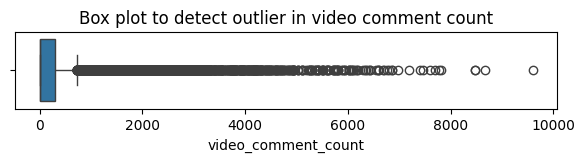

In [ ]:
# Create a boxplot to visualize distribution of `video_comment_count`

plt.figure(figsize=(7,1))
sns.boxplot(data["video_comment_count"], orient="h");
plt.title("Box plot to detect outlier in video comment count");

**The boxplot reveals there are outlier in the data. Also the median value is close to zero, this is an indication of left skew distribution. This can be further explored with a histogram. Clearly the video_comment_count is not normally distributed.**

In [ ]:
# Check and Handle outlier
Q1 = data["video_comment_count"].quantile(0.25)
Q3 = data["video_comment_count"].quantile(0.75)

iqr = Q3 - Q1
upper_limit = Q3 + 1.5 * iqr

data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

In [ ]:
# Check class balance for video_comment_count

data["verified_status"].value_counts(normalize=True)

,proportion
verified_status,
not verified,0.93712
verified,0.06288


In [ ]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes

data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]


# Upsample the minority class (which is "verified")

data_minority_upsample = resample(data_minority,
                                 replace=True,
                                 n_samples=len(data_majority),
                                 random_state=42)

# Combine majority class with upsampled minority class

data_upsampled = pd.concat([data_majority, data_minority_upsample]).reset_index(drop=True)
# Display new class counts

data_upsampled = pd.concat([data_majority, data_minority_upsample]).reset_index(drop=True)
data_upsampled["verified_status"].value_counts()

,count
verified_status,
not verified,17884
verified,17884


In [ ]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions

data_upsampled.groupby(["verified_status"])["video_transcription_text"].agg([("avg_video_transcript_text",lambda x: x.str.len().mean())])

,avg_video_transcript_text
verified_status,
not verified,89.401141
verified,84.563017


**Extract the length of each video_transcription_text and add this as a column to the dataframe, so that it can be used as a potential feature in the model.**

In [ ]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe

data_upsampled["video_transcription_text_length"] = data_upsampled["video_transcription_text"].str.len()

In [ ]:
# Display first few rows of dataframe after adding new column

data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


**Visualize the distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts.**

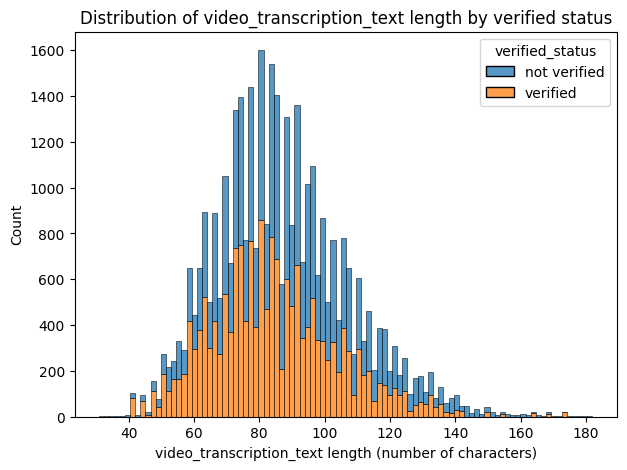

In [ ]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot

plt.figure(figsize=(7,5))
sns.histplot(data=data_upsampled, x="video_transcription_text_length",
             multiple="stack",hue="verified_status")

plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length by verified status")
plt.show()

**Examine correlations**


In [ ]:

# Code a correlation matrix to help determine most correlated variables

data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length
#,1.000000,-0.001369,-0.011800,-0.698969,-0.626105,-0.503634,-0.489758,-0.610763,-0.196817
video_id,-0.001369,1.000000,0.013938,0.001607,0.004534,0.009136,0.006814,0.010564,-0.007634
video_duration_sec,-0.011800,0.013938,1.000000,0.013892,0.004028,0.001944,0.006930,-0.000080,-0.005043
video_view_count,-0.698969,0.001607,0.013892,1.000000,0.855343,0.710466,0.691557,0.747564,0.246867
video_like_count,-0.626105,0.004534,0.004028,0.855343,1.000000,0.832361,0.806369,0.816416,0.217852
video_share_count,-0.503634,0.009136,0.001944,0.710466,0.832361,1.000000,0.709738,0.671601,0.176362
video_download_count,-0.489758,0.006814,0.006930,0.691557,0.806369,0.709738,1.000000,0.794524,0.175287
video_comment_count,-0.610763,0.010564,-0.000080,0.747564,0.816416,0.671601,0.794524,1.000000,0.217179
video_transcription_text_length,-0.196817,-0.007634,-0.005043,0.246867,0.217852,0.176362,0.175287,0.217179,1.000000


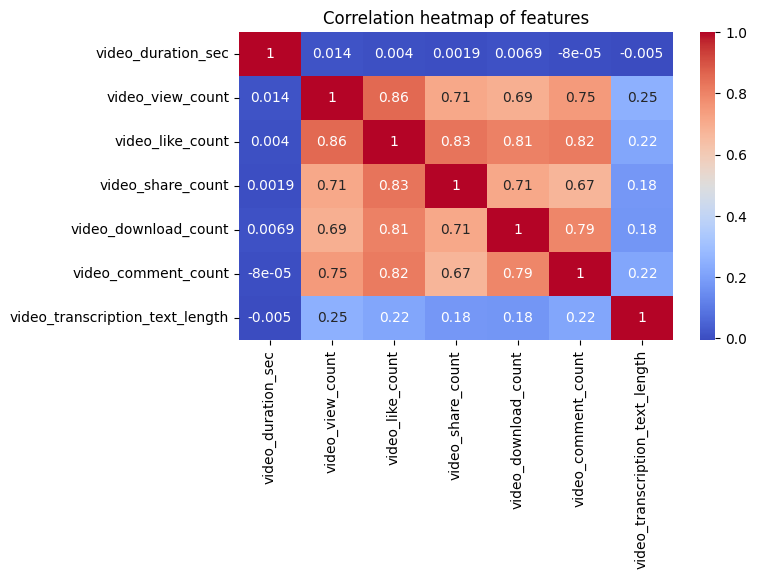

In [ ]:
# Create a heatmap to visualize how correlated variables are

plt.figure(figsize=(7,4))
sns.heatmap(data_upsampled[["video_duration_sec", "claim_status",
                    "author_ban_status", "video_view_count",
                    "video_like_count", "video_share_count",
                    "video_download_count", "video_comment_count",
                    "video_transcription_text_length"]].corr(numeric_only=True),
           annot=True,
           cmap="coolwarm")
plt.title("Correlation heatmap of features")
plt.show()

**Select variables**

In [ ]:
# Select outcome variable

y = data_upsampled["verified_status"]

In [ ]:
# Select features

X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status",
                    "video_view_count", "video_share_count", "video_download_count",
                    "video_comment_count"]]

# Display first few rows of features dataframe

X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


**Train-test split**

In [ ]:
# Split the data into training and testing sets

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Get shape of each training and testing set

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (26826, 7)
Test set shape: (8942, 7)


**Encode variables**

In [ ]:
# Check data types

X_train.dtypes

,0
video_duration_sec,int64
claim_status,object
author_ban_status,object
video_view_count,float64
video_share_count,float64
video_download_count,float64
video_comment_count,float64


In [ ]:
# Get unique values in `claim_status`


X_train["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [ ]:
# Get unique values in `author_ban_status`

X_train["author_ban_status"].unique()

array(['under review', 'active', 'banned'], dtype=object)

As shown above, the claim_status and author_ban_status features are each of data type object currently. In order to work with the implementations of models through sklearn, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [ ]:
# Select the training features that needs to be encoded

Xtrain_to_encode = X_train[["claim_status","author_ban_status"]]


# Display first few rows

Xtrain_to_encode.head()

,claim_status,author_ban_status
28075,opinion,under review
28358,opinion,active
27086,opinion,active
7104,claim,active
25784,opinion,active


In [ ]:
# Set up an encoder for one-hot encoding the categorical features

X_encoder = OneHotEncoder(drop="first", sparse_output=False)
# Fit and transform the training features using the encoder

X_train_encoded = X_encoder.fit_transform(Xtrain_to_encode)
# Get feature names from encoder

X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [ ]:

# Display first few rows of encoded training features

X_train_encoded

array([[1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
# Place encoded training features (which is currently an array) into a dataframe

X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows

X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)

X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
28075,24,4320.0,194.0,23.0,0.0
28358,8,7899.0,143.0,6.0,1.0
27086,53,8796.0,863.0,2.0,0.0
7104,43,176311.0,22270.0,1546.0,557.0
25784,27,519.0,65.0,1.0,0.0


In [ ]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`

X_train_subset = X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True)
X_train_final = pd.concat([X_train_subset, X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,24,4320.0,194.0,23.0,0.0,1.0,0.0,1.0
1,8,7899.0,143.0,6.0,1.0,1.0,0.0,0.0
2,53,8796.0,863.0,2.0,0.0,1.0,0.0,0.0
3,43,176311.0,22270.0,1546.0,557.0,0.0,0.0,0.0
4,27,519.0,65.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Check data type of outcome variable

X_train_final.dtypes

,0
video_duration_sec,int64
video_view_count,float64
video_share_count,float64
video_download_count,float64
video_comment_count,float64
claim_status_opinion,float64
author_ban_status_banned,float64
author_ban_status_under review,float64


In [ ]:
# Get unique values of outcome variable

y.unique()

array(['not verified', 'verified'], dtype=object)

In [ ]:
# Set up an encoder for one-hot encoding the categorical outcome variable

y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model

y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 0., 0., 0.])


**Model building**

In [ ]:
# Construct a logistic regression model and fit it to the training set


log_clf = LogisticRegression(random_state=42, max_iter=800).fit(X_train_final, y_train_final)

**Results and evaluation**

In [ ]:
# Select the testing features that needs to be encoded

X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Display first few rows

X_test_to_encode.head()

,claim_status,author_ban_status
26849,opinion,active
1227,claim,under review
25467,opinion,under review
27310,opinion,banned
27560,opinion,banned


In [ ]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0


In [ ]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(["claim_status", "author_ban_status"], axis=1).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
26849,14,1580.0,49.0,12.0,1.0
1227,43,862507.0,86137.0,3206.0,265.0
25467,52,449.0,20.0,0.0,0.0
27310,17,4458.0,111.0,6.0,2.0
27560,8,9877.0,65.0,5.0,1.0


In [ ]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`

X_test_final = pd.concat([X_test.drop(["claim_status", "author_ban_status"], axis=1).reset_index(drop=True),X_test_encoded_df], axis=1)

# Display first few rows

X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,14,1580.0,49.0,12.0,1.0,1.0,0.0,0.0
1,43,862507.0,86137.0,3206.0,265.0,0.0,0.0,1.0
2,52,449.0,20.0,0.0,0.0,1.0,0.0,1.0
3,17,4458.0,111.0,6.0,2.0,1.0,1.0,0.0
4,8,9877.0,65.0,5.0,1.0,1.0,1.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.


In [ ]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)

In [ ]:

# Display the predictions on the encoded testing set
y_pred

array([1., 0., 1., ..., 1., 1., 1.])

In [ ]:
# Display the true labels of the testing set
y_test

,verified_status
26849,verified
1227,not verified
25467,verified
27310,verified
27560,verified
...,...
16315,not verified
19045,verified
30024,verified
17501,not verified


Encode the true labels of the testing set so it can be compared to the predictions.



In [ ]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions

y_test_final = y_encoder.fit_transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_test_final

array([1., 0., 1., ..., 1., 0., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [ ]:
# Get shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

**Visualize model results**

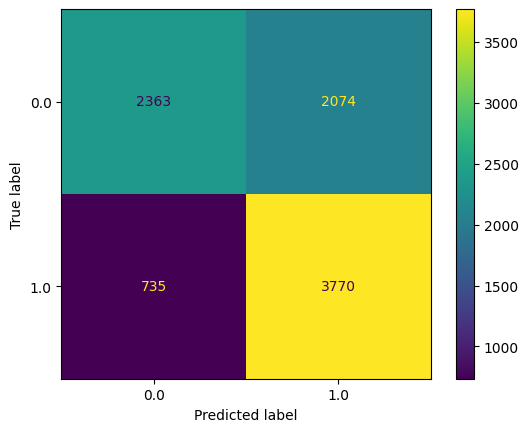

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

**The upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.**

**The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.**

**The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.**

**The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so. **

In [ ]:
# Create a classification report
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.76      0.53      0.63      4437
not verified       0.65      0.84      0.73      4505

    accuracy                           0.69      8942
   macro avg       0.70      0.68      0.68      8942
weighted avg       0.70      0.69      0.68      8942



** Interpret model coefficients**

In [ ]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
log_clf.feature_names_in_
log_clf.coef_[0]
feature_names_coeffs = pd.DataFrame(data={"features name": log_clf.feature_names_in_, "model coefficient": log_clf.coef_[0]})
feature_names_coeffs

,features name,model coefficient
0,video_duration_sec,-8.610980e-04
1,video_view_count,-1.807631e-07
2,video_share_count,5.098067e-06
3,video_download_count,-1.080283e-04
4,video_comment_count,5.235879e-04
5,claim_status_opinion,1.682386e+00
6,author_ban_status_banned,-3.795364e-01
7,author_ban_status_under review,-1.259531e-01


video_like_count shows strong correlation with a few other features which can lead to multicollinearity issues

# Machine Learning Models for Classification


TikTok users can report videos that they believe violate the platform's terms of service. Because there are millions of TikTok videos created and viewed every day, this means that many videos get reported—too many to be individually reviewed by a human moderator.

Analysis indicates that when authors do violate the terms of service, they're much more likely to be presenting a claim than an opinion. Therefore, it is useful to be able to determine which videos make claims and which videos are opinions.

TikTok wants to build a machine learning model to help identify claims and opinions. Videos that are labeled opinions will be less likely to go on to be reviewed by a human moderator. Videos that are labeled as claims will be further sorted by a downstream process to determine whether they should get prioritized for review. For example, perhaps videos that are classified as claims would then be ranked by how many times they were reported, then the top x% would be reviewed by a human each day.

A machine learning model would greatly assist in the effort to present human moderators with videos that are most likely to be in violation of TikTok's terms of service.

The purpose of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

The goal of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".

This activity has three parts:

**Part 1: Ethical considerations**

Consider the ethical implications of the request

Should the objective of the model be adjusted?

**Part 2: Feature engineering**

Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3: Modeling**

Build the models, evaluate them, and advise on next steps

TikTok users can report videos that they believe violate the platform's terms of service. Because there are millions of TikTok videos created and viewed every day, this means that many videos get reported—too many to be individually reviewed by a human moderator.

Analysis indicates that when authors do violate the terms of service, they're much more likely to be presenting a claim than an opinion. Therefore, it is useful to be able to determine which videos make claims and which videos are opinions.

TikTok wants to build a machine learning model to help identify claims and opinions. Videos that are labeled opinions will be less likely to go on to be reviewed by a human moderator. Videos that are labeled as claims will be further sorted by a downstream process to determine whether they should get prioritized for review. For example, perhaps videos that are classified as claims would then be ranked by how many times they were reported, then the top x% would be reviewed by a human each day.

A machine learning model would greatly assist in the effort to present human moderators with videos that are most likely to be in violation of TikTok's terms of service.

The data dictionary shows that there is a column called claim_status. This is a binary value that indicates whether a video is a claim or an opinion. This will be the target variable. In other words, for each video, the model should predict whether the video is a claim or an opinion.

This is a classification task because the model is predicting a binary class.

Select an evaluation metric

To determine which evaluation metric might be best, consider how the model might be wrong. There are two possibilities for bad predictions:

False positives: When the model predicts a video is a claim when in fact it is an opinion
False negatives: When the model predicts a video is an opinion when in fact it is a claim

What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)

In the given scenario, it's better for the model to predict false positives when it makes a mistake, and worse for it to predict false negatives. It's very important to identify videos that break the terms of service, even if that means some opinion videos are misclassified as claims. The worst case for an opinion misclassified as a claim is that the video goes to human review. The worst case for a claim that's misclassified as an opinion is that the video does not get reviewed and it violates the terms of service. A video that violates the terms of service would be considered posted from a "banned" author, as referenced in the data dictionary.

Because it's more important to minimize false negatives, the model evaluation metric will be recall.



Modeling workflow and model selection process

Previous work with this data has revealed that there are ~20,000 videos in the sample. This is sufficient to conduct a rigorous model validation workflow, broken into the following steps:

Split the data into train/validation/test sets (60/20/20)
Fit models and tune hyperparameters on the training set
Perform final model selection on the validation set
Assess the champion model's performance on the test set



In summary: Objective
This is the final goal of this project: to develop a predictive model for classifying whether a video contains a claim or offers an opinion. The model has the potential to reduce a backlog of user reports and prioritize them more efficiently. Understanding the features that most impact these predictions will have business and ethical implications as well.

False Negatives vs. False Positives

If the model predicts a false positive (i.e., the model classifies a video as a "claim" when it does not contain one), the video will undergo additional review and receive greater scrutiny by the TikTok team. Although this may create more work internally for the team that is responsible for reviewing videos, it does not create ethical concerns.
If the model predicts a false negative (i.e., the model classifies a video as an "opinion" when it actually contains a claim), the video may be missed for review. This could result in content being released to viewers that should be scrutinized more closely and ultimately leads to ethical concerns.
Therefore, the model should limit false negative predictions.


Imports and data loading

In [ ]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# XGBoost
from xgboost import XGBClassifier
from xgboost import plot_importance
data = pd.read_csv("/content/drive/My Drive/TIKTOK_DATASET.csv")

In [ ]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
data.shape

(19382, 12)

In [ ]:
# Get data types of columns
data.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


In [ ]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [ ]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [ ]:
# Check for missing values

data.isna().mean()

,0
#,0.000000
claim_status,0.015375
video_id,0.000000
video_duration_sec,0.000000
video_transcription_text,0.015375
verified_status,0.000000
author_ban_status,0.000000
video_view_count,0.015375
video_like_count,0.015375
video_share_count,0.015375


In [ ]:
# Drop rows with missing values
### YOUR CODE HERE ###

data = data.dropna(axis=0)
data.shape

(19084, 12)

In [ ]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().sum()

0

**There are no duplicate in the dataset.**


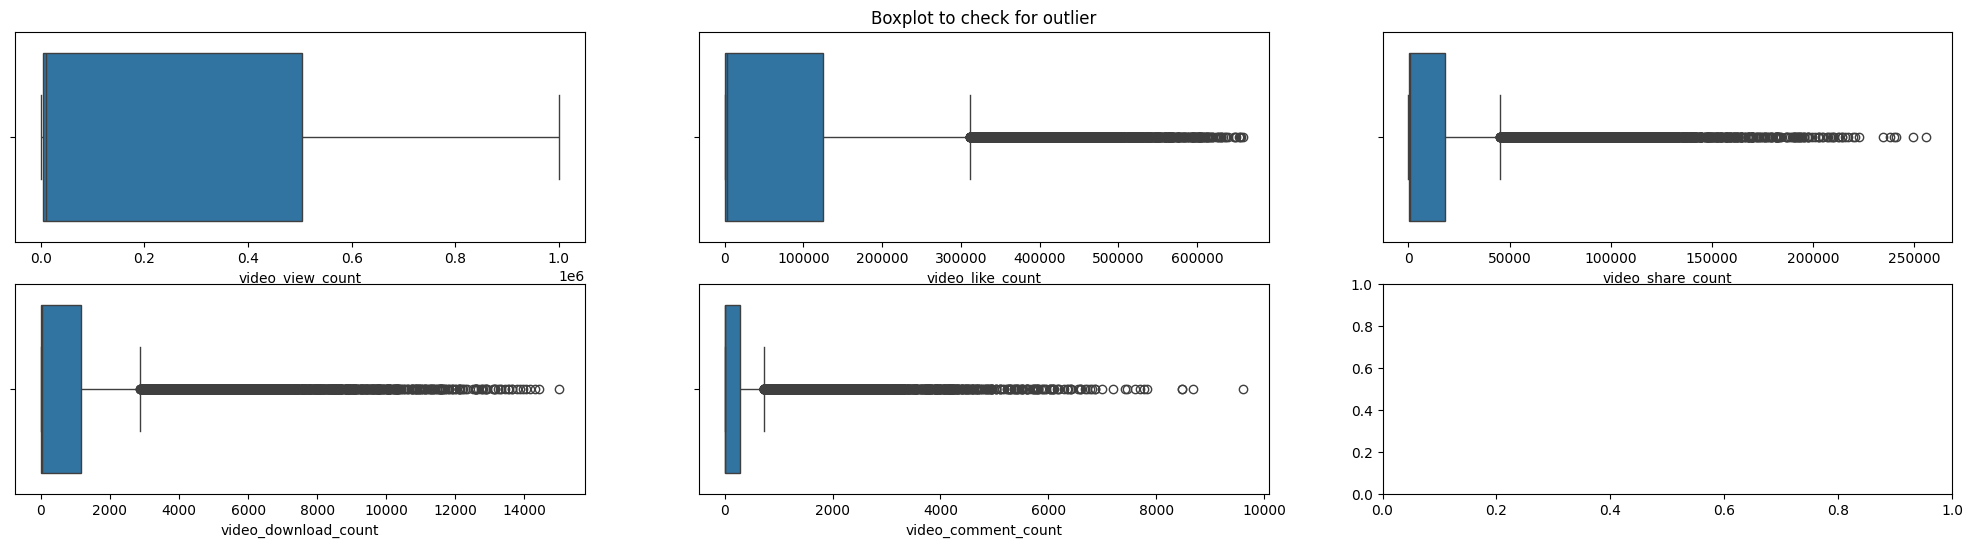

In [ ]:
#From the result of data.describe(), there maybe outliers in the following variables:

#video_view_count
#video_like_count
#video_share_count
#video_download_count
#video_comment_count


fig, axes = plt.subplots(2,3, figsize=(25,6))
sns.boxplot(data=data, x="video_view_count", orient="h", ax=axes[0, 0])

sns.boxplot(data=data, x="video_like_count", orient="h", ax=axes[0, 1])

sns.boxplot(data=data, x="video_share_count", orient="h", ax=axes[0, 2])

sns.boxplot(data=data, x="video_download_count", orient="h", ax=axes[1, 0])

sns.boxplot(data=data, x="video_comment_count", orient="h", ax=axes[1, 1])

axes[0, 1].set_title("Boxplot to check for outlier");

In [ ]:
#Handle outlier in video like count
Q1 = data["video_like_count"].quantile(0.25)
Q3 = data["video_like_count"].quantile(0.75)

# Compute the interquantile range
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
upper_limit
data.loc[data["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

In [ ]:
# Handle outlier in video share count
Q1 = data["video_download_count"].quantile(0.25)
Q3 = data["video_download_count"].quantile(0.75)

# Compute the interquantile range
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
upper_limit
data.loc[data["video_download_count"] > upper_limit, "video_download_count"] = upper_limit

In [ ]:
# Handle outlier in video share count
Q1 = data["video_share_count"].quantile(0.25)
Q3 = data["video_share_count"].quantile(0.75)

# Compute the interquantile range
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
upper_limit
data.loc[data["video_share_count"] > upper_limit, "video_share_count"] = upper_limit

In [ ]:
# Handle outlier in video comment count
Q1 = data["video_comment_count"].quantile(0.25)
Q3 = data["video_comment_count"].quantile(0.75)

# Compute the interquantile range
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
upper_limit
data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

In [ ]:
# Check class balance
### YOUR CODE HERE ###
data["claim_status"].value_counts(normalize=True)

,proportion
claim_status,
claim,0.503458
opinion,0.496542


**The claim_status class is well balanced. There is no need to perform about class operation on this variable. 50% video content contains claims**

In [ ]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data["text_length"] = data["video_transcription_text"].str.len()
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [ ]:
# Calculate the average text_length for claims and opinions
### YOUR CODE HERE ###
data.groupby(["claim_status"])["text_length"].agg([("avg_txt_length", "mean")])

,avg_txt_length
claim_status,
claim,95.376978
opinion,82.722562


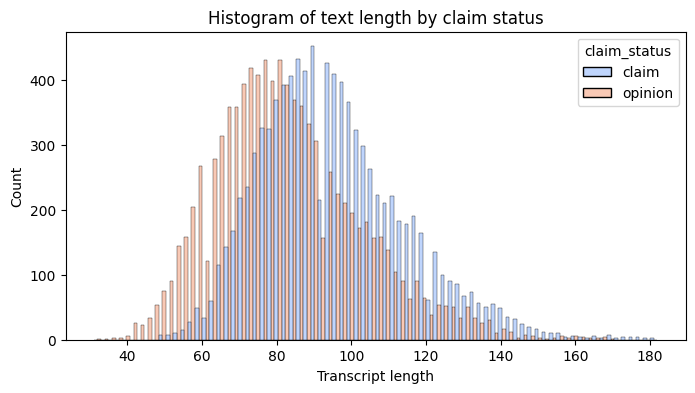

In [ ]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###

plt.figure(figsize=(8,4))
sns.histplot(data=data, x="text_length", hue="claim_status", multiple="dodge", palette="coolwarm")
plt.title("Histogram of text length by claim status")
plt.xlabel("Transcript length");

**Encode target and catgorical variables.**



In [ ]:
data.columns


Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'text_length'],
      dtype='object')

In [ ]:
# Create a copy of the X data
X = data.copy()

# Drop unnecessary columns
X = X.drop(columns=["#", "video_id"], axis=1)

# Encode target variable
X["claim_status"] = X["claim_status"].replace({"opinion": 0, "claim": 1})

# Dummy encode remaining categorical values
X = pd.get_dummies(X, columns=["verified_status", "author_ban_status"], drop_first=True)

X.head()

<ipython-input-35-33cf9fea5fae>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["claim_status"] = X["claim_status"].replace({"opinion": 0, "claim": 1})


,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


**Split the data**

In [ ]:
# Isolate target variable
y = X["claim_status"]

In [ ]:
# Isolate features
X = X.drop(["claim_status"], axis=1)

# Display first few rows of features dataframe
X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


**Create train/validate/test sets**

In [ ]:
 #Split the data into training and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.**



In [ ]:
# Futher split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [ ]:
# Get shape of each training, validation, and testing set
print(f"Dimension of training set: {X_train.shape}")
print(f"Dimension of validation set: {X_val.shape}")
print(f"Dimension of test set: {X_test.shape}")

Dimension of training set: (11450, 11)
Dimension of validation set: (3817, 11)
Dimension of test set: (3817, 11)


**Tokenize text column**
The feature video_transcription_text is text-based. The transcript can have different length, include nonwords, have spelling errors etc. We need a way to featurize the feature.

The simplist and most common featurization is bag-of-words model. We score each row for the presence and absence of each of the words in the English langauge dictionary. If the dictionary contains M words, that means for each document we create a binary feature vector of length M, and score a 1 for every word present, and 0 otherwise.

The bag-of-words model summarizes a text by the words present, and ignores their context. One way to take the context into account is the bag-of-n-grams model.

One way to extract numerical features from it is through a bag-of-words algorithm like CountVectorizer.

CountVectorizer works by splitting text into n-grams, which are groups of n consecutive words. For instance, "a dime for a cup of coffee" (phrase A) broken into 2-grams would result in six two-word combinations:

a dime | dime for |for a| a cup | cup of | of coffee |

Then, the next sample's text would be parsed into 2-grams. So, "ask for a cup for a child" (phrase B) would result in:

ask for |for a| a cup | cup for | for a | a child |

This process would repeat for each observation in the dataset, and each n-gram would be treated like a distinct feature. Then, the text of each observation is compared to the full array of n-grams, and the numbers of occurrences are tallied:



In [ ]:
import pandas as pd

# Define the table as a dictionary
data = {
    'a dime': [1, 0],
    'dime': [1, 0],
    'for': [1, 0],
    'a': [1, 1],
    'cup': [1, 1],
    'of': [1, 0],
    'ask': [1, 1],
    'cup for': [0, 1],
    'coffee': [0, 1],
    'a child': [0, 1]
}

# Create a DataFrame
df = pd.DataFrame(data, index=['phrase A', 'phrase B'])

# Add a total row for sum of each column
df.loc['TOTAL'] = df.sum()

# Display the DataFrame
print(df)


          a dime  dime  for  a  cup  of  ask  cup for  coffee  a child
phrase A       1     1    1  1    1   1    1        0       0        0
phrase B       0     0    0  1    1   0    1        1       1        1
TOTAL          1     1    1  2    2   1    2        1       1        1


This would happen for the text of each observation in the data, and the text of each observation is parsed to get tallies for all the 2-word phrases from the entire data set for each observation, creating a large matrix.

If text is broken into 1-grams, then each feature in the matrix is an individual word.

After the count matrix has been created, CountVectorizer lets you the choose to keep only the most frequently occurring n-grams. You specify how many. The n-grams that you select can then be used as features in a model.

Splitting text into n-grams is an example of tokenization. Tokenization is the process of breaking text into smaller units to derive meaning from the resulting tokens.

This notebook breaks each video's transcription text into both 2-grams and 3-grams, then takes the 15 most frequently occurring tokens from the entire dataset to use as features.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer as CV

# Instantiate the CountVectorizer
cv = CV()

Text1 = "Natural Language Processing is a subfield of AI"
tag1 = "NLP"

Text2 = "Computer Vision is a subfield of AI"
tag2 = "CV"

cv.fit([Text1, Text2])
x = cv.transform([Text1]).toarray()
y = cv.transform([Text2]).toarray()

columns = cv.get_feature_names_out()
df1 = pd.DataFrame(x, columns=columns, index=["Text1"])
df2 = pd.DataFrame(y, columns=columns, index=["Text2"])

df = pd.concat([df1, df2])
df["tag"] = [tag1, tag2]
df

,ai,computer,is,language,natural,of,processing,subfield,vision,tag
Text1,1,0,1,1,1,1,1,1,0,NLP
Text2,1,1,1,0,0,1,0,1,1,CV


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = tfidf(norm=None)
# tfidf.fit([Text1, Text2])

# x = tfidf.transform([Text1]).toarray()
# y = tfidf.transform([Text2]).toarray()

# columns = tfidf.get_feature_names_out()

# df1 = pd.DataFrame(x, columns=columns, index=["Text1"])
# df2 = pd.DataFrame(y, columns=columns, index=["Text2"])

# df = pd.concat([df1, df2], axis=0)

# df

In [ ]:
tfidf_vec = TfidfVectorizer(ngram_range=(2, 3),
              max_features=15,
              stop_words="english")
tfidf_vec

TfidfVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [ ]:
# Extract the numerical features from `video_transcription_text` in the training set
count_data = tfidf_vec.fit_transform(X_train["video_transcription_text"]).toarray()
count_data

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        0.       ],
       [0.4692621, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [ ]:
# Place the numerical representation of ``video_transcription_text` from the training set into a dataframe

count_df = pd.DataFrame(data=count_data, columns=tfidf_vec.get_feature_names_out())
count_df.head()

,colleague learned,colleague read,discussion board,forum claim,friend learned,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0.000000,0.0,0.0,0.000000,0.700285,0.0,0.000000,0.000000,0.713863,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
2,0.469262,0.0,0.0,0.532149,0.000000,0.0,0.461983,0.532149,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Concatenate X_train and count_df to form the final dataframe for trainin data
# Note: Using `.reset_index(drop=True` to reset the index in X_train after dropping `video_transcription_text`

X_train_final = pd.concat([X_train.drop(columns=["video_transcription_text"]).reset_index(drop=True), count_df], axis=1)

X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,55,254459.0,66996.0,2673.0,220.0,95.0,97,False,False,True,...,0.0,0.000000,0.000000,0.713863,0.0,0.0,0.0,0.0,0.0,0.0
1,40,433056.0,85389.0,13301.0,1766.0,1.0,110,False,False,True,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
2,29,997358.0,83574.0,17310.0,951.0,530.0,155,False,True,False,...,0.0,0.461983,0.532149,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,15,122973.0,53791.0,14407.0,257.0,8.0,89,False,True,False,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,17,948.0,309.0,61.0,8.0,2.0,77,True,False,False,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


**Get n-gram counts for the validation data. The vectorizer is not being refit to the validation data. It's only transforming it. In other words, the transcriptions of the videos in the validation data are only being checked agains the n-grams found in the training data**

In [ ]:
validation_count_data = tfidf_vec.transform(X_val["video_transcription_text"]).toarray()
validation_count_data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.60160123,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:

# Place the numerical representation of `video_transcription_text` from validation set in dataframe
validation_count_df = pd.DataFrame(data=validation_count_data, columns=tfidf_vec.get_feature_names_out())
validation_count_df.head()

,colleague learned,colleague read,discussion board,forum claim,friend learned,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0.0,0.0,0.0,0.0,0.583435,0.0,0.0,0.0,0.0,0.5456,0.0,0.0,0.0,0.601601,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,1.0


In [ ]:
# Concatenate X_train and count_df to form the final dataframe for trainin data
# Note: Using `.reset_index(drop=True` to reset the index in X_train after dropping `video_transcription_text`

X_val_final = pd.concat([X_val.drop(columns=["video_transcription_text"]).reset_index(drop=True), validation_count_df], axis=1)

X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,34,761969.0,311333.875,45382.5,2880.125,728.5,98,False,False,False,...,0.0,0.0,0.0,0.0,0.5456,0.0,0.0,0.0,0.601601,0.0
1,54,4168.0,965.000,106.0,9.000,2.0,95,False,False,False,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0
2,43,8347.0,1684.000,134.0,39.000,7.0,84,False,False,False,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0
3,6,6902.0,2861.000,20.0,27.000,1.0,74,False,False,False,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0
4,20,37.0,8.000,1.0,0.000,0.0,96,False,False,False,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,1.0


In [ ]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_data = tfidf_vec.transform(X_test["video_transcription_text"]).toarray()

test_count_df = pd.DataFrame(data=test_count_data, columns=tfidf_vec.get_feature_names_out())

# Concatenate X_test and test_count_df to form the final dataframe for testing data
X_test_final = pd.concat([X_test.drop(columns=["video_transcription_text"]
                                     ).reset_index(drop=True),test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,22,6517.0,337.000,120.0,5.000,0.0,73,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,39,758131.0,41367.000,11288.0,774.000,143.0,83,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722141,0.0
2,17,613559.0,311333.875,45382.5,2880.125,728.5,76,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,9,363966.0,196481.000,1246.0,1593.000,657.0,114,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,5,582955.0,86748.000,7182.0,865.000,21.0,98,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


**Build models**

: Build a decision tree model
Fit a decision tree mode to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall. We’ll begin by training a baseline model to understand how predictive the data is and to generate scores for future reference. This will also demonstrate the steps of creating and fitting the model, followed by using it to make predictions on the test data.








In [ ]:
# Instantiate the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree.fit(X_train_final, y_train)

# Make prediction on test data
dt_pred = decision_tree.predict(X_test_final)

In [ ]:
# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))

Accuracy: 0.996
Precision: 0.997
Recall: 0.995
F1 Score: 0.996


**Analysis of baseline model**
**Confusion matrix**

Let's inspect the confusion matrix of our decision tree's predictions. First, we'll write a short helper function to help us display the matrix.



In [ ]:
def conf_matrix_plot(model, x_data, y_data):
    """
    Accepts as argument model object, X data (test or validation),
    and y data (test or validation).
    Returns a plot of confusion matrix for predictions on y data."""
    ax = plt.subplots(figsize=(4,4))[1]
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot(values_format="", ax=ax)
    plt.show

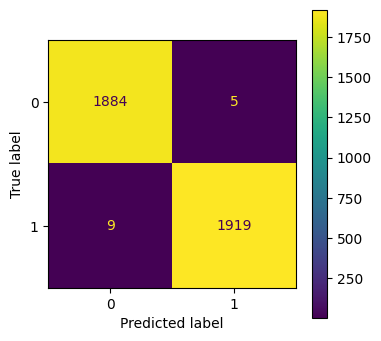

In [ ]:

# Generate the confusion matrix for the base decision tree
conf_matrix_plot(decision_tree, X_test_final, y_test)

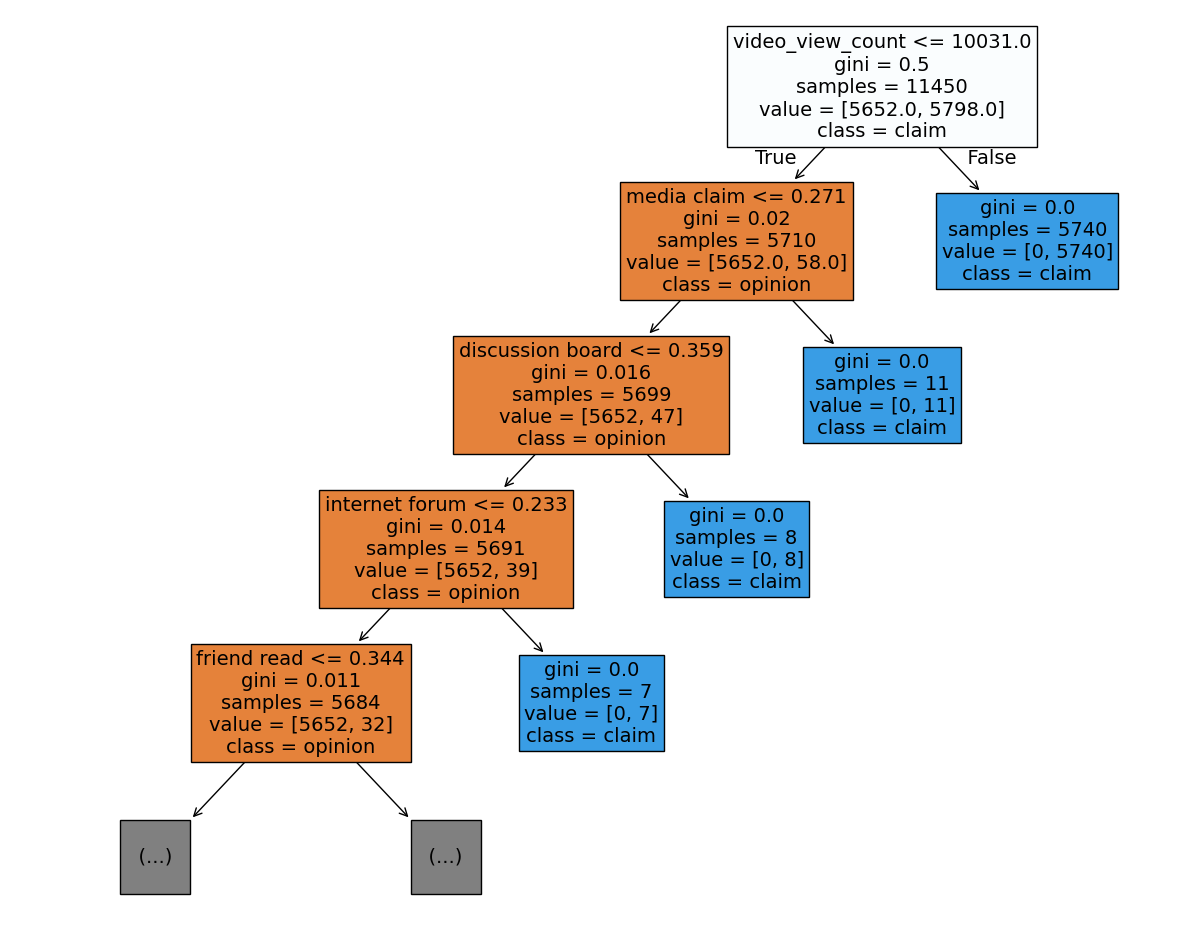

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Ensure decision_tree is defined and fitted, for example:
# decision_tree = DecisionTreeClassifier().fit(X_train_final, y_train)

plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=4,
          fontsize=14,
          feature_names=X_train_final.columns,
          class_names=["opinion", "claim"], filled=True)
plt.show()


Build a random forest model

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.


**On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
**

In [ ]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {"max_depth": [5, 7, None],
            "max_features": [0.3, 0.6],
            "max_samples": [0.6],
            "min_samples_leaf": [1,2,3],
            "min_samples_split": [1,2,3],
            "n_estimators": [100, 200]
            }


# Define a dictionary of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1"}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, param_grid=cv_params, scoring=scoring, cv=5, refit="recall")

In [ ]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {"max_depth": [5, 7, None],
            "max_features": [0.3, 0.6],
            "max_samples": [0.6],
            "min_samples_leaf": [1,2,3],
            "min_samples_split": [1,2,3],
            "n_estimators": [100, 200]
            }


# Define a dictionary of scoring metrics to capture
# Changed from set to list of strings
scoring = ["accuracy", "precision", "recall", "f1"]

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, param_grid=cv_params, scoring=scoring, cv=5, refit="recall")

In [ ]:
%%time
rf_cv.fit(X_train_final, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

CPU times: user 8min 46s, sys: 1 s, total: 8min 47s
Wall time: 9min 9s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.6], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
# Examine best recall score
rf_cv.best_score_

0.9955157537710868

In [ ]:
# Estimate best parameters
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.3,
 'max_samples': 0.6,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [ ]:
best_index = rf_cv.best_index_
best_mean_precision = rf_cv.cv_results_["mean_test_precision"][best_index]
best_mean_precision

0.9994814174589456

The model performed well, with an average recall score of 0.995 across the five cross-validation folds. It is clear the model is making almost a perfect classification. This is always an indication of data leakage or some other issues

In [ ]:
def make_results(model_name, model_object):
    """
    Accepts as arguments a mode name and a fit GridSerch model object

    Return a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.

    Parameters
    ==========
    model_name:  str
        Your prefered mode name
    model_object: Model
        Fitted Gridsearch model

    Return
    ======
    table: pd.DataFrame

    """
      # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(rf_cv.cv_results_)
    # Isolate the row of the df with the max(mean precision score)
    best_estimator_results = cv_results.iloc[cv_results["mean_test_precision"].idxmax(), :]
    # Extract accuracy, precision, recall, f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    table = pd.DataFrame({"Model": [model_name],
                         "F1": [f1],
                         "Recall": [recall],
                         "Precision": [precision],
                         "Accuracy": [accuracy]})
    return table



In [ ]:
rf_df = make_results("Random Forest CV", rf_cv)
rf_df

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.99619,0.992411,1.0,0.996157


In [ ]:
# Examine best parameters
rf_cv.best_score_

0.9955157537710868

**Pickle**

pickle is a tool that saves the fit model object to a specified location, then quickly reads it back in. It also allows you to use models that were fit somewhere else, without having to train them yourself. i save the filr on google drive as an example

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Define the path to the folder in Google Drive
path = "/content/drive/My Drive/models/"  # Adjust this if the folder is elsewhere in your Drive

# Step 3: Ensure the folder exists, create if necessary
import os
if not os.path.exists(path):
    os.makedirs(path)

# Step 4: Save a dummy file (e.g., a model or text file) to the folder
file_name = "example_model.txt"
file_path = os.path.join(path, file_name)

# Write to the file
with open(file_path, "w") as f:
    f.write("This is a test model file.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
# Pickle the model
with open(path+"rf_cv_model.pickle", "wb") as to_write:
    pickle.dump(rf_cv, to_write)

In [ ]:
# Test reading the model
with open(path + "rf_cv_model.pickle", "rb") as read_to:
    rf_cv = pickle.load(read_to)

**Build an XGBoost model** : Generally, Xgboost parameters have been divided into 4 categories: General, Booster, Learning task and Command line parameters

In [ ]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective="binary:logistic", random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {"max_depth": [3,7,10],
             "min_child_weight": [0, 3, 5, 10],
             "learning_rate": [0.01, 0.1],
             "n_estimators": [80, 300, 500],
             "subsample" : [0.8, 1]
             }

# Define a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1"]

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, param_grid=cv_params, scoring=scoring, refit="recall")

In [ ]:
%%time
xgb_cv.fit(X_train_final, y_train)

CPU times: user 13min 11s, sys: 5.86 s, total: 13min 17s
Wall time: 7min 54s


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 7, 10],
                         'min_child_weight': [0, 3, 5, 10],
                         'n_estimators': [80, 300, 500],
                         'subsample': [0.8, 1]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
xgb_cv.best_params_


{'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 0,
 'n_estimators': 80,
 'subsample': 1}

In [ ]:
xgb_cv.best_score_


0.9949986611525989

In [ ]:
#Save the model as a pickle file
# Pickle the model
with open(path+"xgb_cv_model.pickle", "wb") as to_write:
    pickle.dump(xgb_cv, to_write)

In [ ]:
# Get all the results from the CV and put them in a df
xgb_df = make_results("XGBoost CV", xgb_cv)
xgb_df

,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.99619,0.992411,1.0,0.996157


In [ ]:
pd.concat([rf_df, xgb_df])


,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.99619,0.992411,1.0,0.996157
0,XGBoost CV,0.99619,0.992411,1.0,0.996157


This model also performed exceptionally well. With identical result as the Random forest.



**Evaluate model**

Random forest


In [ ]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_pred = rf_cv.best_estimator_.predict(X_val_final)

In [ ]:
# Display the predictions on the encoded testing set
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
y_val

,claim_status
1871,1
16574,0
17741,0
17214,0
17821,0
...,...
15929,0
12177,0
18295,0
17339,0


Create a confusion matrix to visualize the results of the classification model.



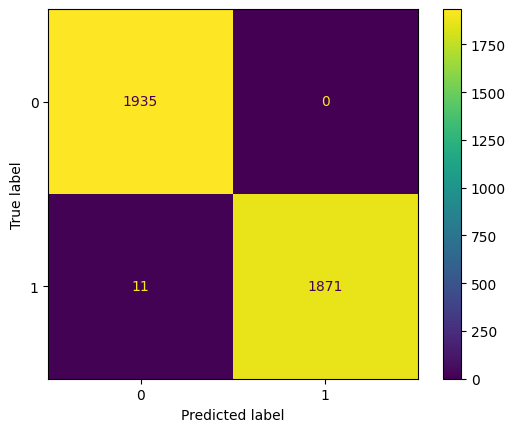

In [ ]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_val, y_pred,labels=rf_cv.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()
# Display plot
plt.show()

The upper-left quadrant displays the number of true negative (TN): The number of opinions that the model accurately classified as so

The upper-right quandrant displays the number of false positives (FP): The number of opinions that the model misclassified as claim

The lower-left quandrant displays the number of false negative (FN): The number of claims that the model missclassified as opinions

The lower-right quandrant displays the number of true positve (TP): The number of claims that the model classified as claims.

As the above confusion matrix shows,this model does not produce a false positves.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [ ]:
# Create a classification report
# Create classification report for random forest model
target_labels = ["opinion", "claim"]
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1935
       claim       1.00      0.99      1.00      1882

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



Question: What does your classification report show? What does the confusion matrix indicate?

The classification report above shows that the random forest model score were nearly perfect. The confusion matrix show there were 11 misclassifications--false negatives and zero false positives

**XGBoost**

In [ ]:
#Evaluate XGBoost model
### YOUR CODE HERE ###
y_pred = xgb_cv.best_estimator_.predict(X_val_final)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

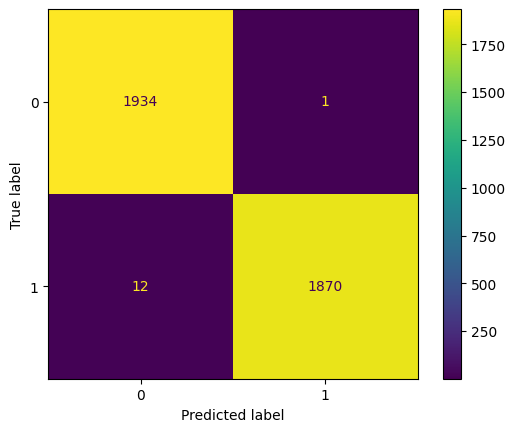

In [ ]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_val, y_pred,labels=xgb_cv.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()
# Display plot
plt.show()

In [ ]:
# Create a classification report
# Create classification report for random forest model
target_labels = ["opinion", "claim"]
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1935
       claim       1.00      0.99      1.00      1882

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



Question: Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

The results of the XGBoost model were also nearly perfect. However, its errors tended to be false negatives. Identifying claims was the priority, so it's important that the model be good at capturing all actual claim videos. The random forest model has a better recall score, and is therefore the champion model.

**Use champion model to predict on test data**


Both Random forest and XGBoist model archetectures resulted in nearly perfect models, in this case random forest performed a little better , so it is the champion model

In [ ]:
### YOUR CODE HERE ###
y_pred = rf_cv.best_estimator_.predict(X_test_final)

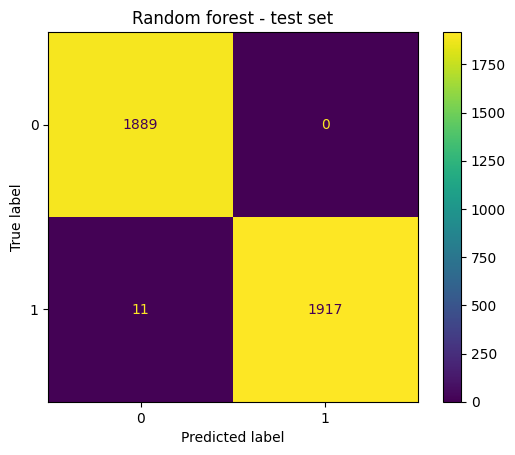

In [ ]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_cv.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.title("Random forest - test set")
plt.show()

**Feature importances of champion model**

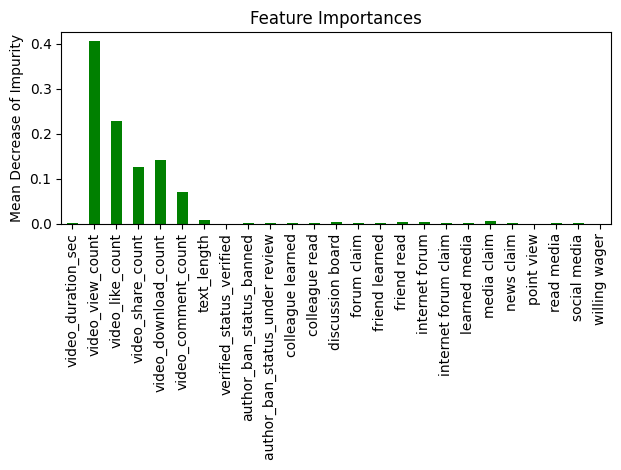

In [ ]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_train_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax, color='green')  # Set the bar colour to green
ax.set_title("Feature Importances")
ax.set_ylabel("Mean Decrease of Impurity")
fig.tight_layout()

Question: Describe your most predictive features. Were your results surprising?

The most importance featues all were related to the engagement levels generated by the video. This is not unexpected as prior EDA pointed to this conclusion

Both of the machine learning models built here, a random forest model and an extreme gradient boosted model, performed extremely well against the holdout test dataset. Ultimately, the random forest model performed ever so slightly better and is considered the champion model. The model's most predictive features were all related to audience engagement levels (video_view_count, video_like_count, video_download_count, and video_share_count), suggesting that the model classifies videos based on the values each entry has for these variables. The models built here perform well enough that there is no need for additional hyperparameter tuning or feature engineering; however, additional evaluation with any further data is recommended prior to deployment.

# Summary & Recommendations




The goal of this project was to develop a predictor model to classify user-reported TikTok videos as "claim" or opinion".

The exploratory data analysis revealed that several variables in the dataset had highly skewed distributions, reflecting the dynamics of social media. Videos classified as "claim" tended to attract more attention than those labelled as "opinion". Statistical analysis showed a significant difference in view counts between videos posted by verified accounts and those by unverified accounts. However, a logistic regression model did not perform well in distinguishing between "verified" and "not verified" users.

Further exploration indicated that video engagement was more strongly associated with claim status than with author ban status. This suggests a potential link between claim status and verified status. Two robust tree-based ensemble machine learning models were developed to classify videos as either "claim" or "opinion". The top-performing model confirmed that features related to video engagement were the most predictive. Videos with higher views, likes, downloads, and shares were more likely to be classified as "claim".

The models achieved satisfactory performance without requiring further hyperparameter tuning or feature engineering. However, it is recommended to validate the models with additional data before deployment. Post-deployment monitoring is also advised to ensure the models remain effective, particularly given the potential variability in video engagement, which drives the key predictive.

**Would you recommend using this model? Why or why not?** Yes, because it performed well on both validation and test holdout data. Furthermore, both f1 and precision scores were consistently high. The model successful classified claims and opinions

**What was your model doing? Can you explain how it was making predictions?** By the result obtained from Feature Importance, the most predictive features were all related to the user engagement levels associated with each video. The model was classifying video based on how many views, likes, shares, and downloads they received

**Are there new features that you can engineer that might improve model performance?** The model performed exceptionally well, there is no need to perform feature engineer that can improve the model

**What features would you want to have that would likely improve the performance of your model?** Because of the exceptional performance of the model, it doesn't need any new featutes. However, it would be helpful to have the number of times the video was reported.

In [108]:
!pip install nbconvert


In [109]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


In [111]:
!apt-get install -y pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-luatex pandoc-citeproc context wkhtmltopdf librsvg2-bin groff ghc nodejs php python
  libjs-mathjax libjs-katex citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 51 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pandoc-

In [113]:
!jupyter nbconvert --to pdf /content/Alireza_Abdi_TIKTOK_PROJECT.ipynb


[NbConvertApp] Converting notebook /content/Alireza_Abdi_TIKTOK_PROJECT.ipynb to pdf
[NbConvertApp] Support files will be in Alireza_Abdi_TIKTOK_PROJECT_files/
[NbConvertApp] Making directory ./Alireza_Abdi_TIKTOK_PROJECT_files
[NbConvertApp] Writing 318021 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1218726 bytes to /content/Alireza_Abdi_TIKTOK_PROJECT.pdf
